In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import numpy as np
print(tf.__version__)#should be 1.12.0

1.12.0


In [11]:
#gets the data from datases stored by keras library
#the returned data is preprocessed data (words are converted to integers)
#integers represent the word in a predefined dictionary which is stored and maintained by keras
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)#num_words=10000 which specifies the number of distinct words to be considered


In [4]:
#splitting th data in test and training sets 50-50 basis
print("Training entries: {}, labels: {}".format(len(train_data),len(train_labels)))#visualizing the train and test data


Training entries: 25000, labels: 25000


In [5]:
print(train_data[0])#test

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
print(len(train_data[0]))#number of words in a particular review

218


In [61]:
#A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

#The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
#func to convert integers to words 
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [13]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK is an amazing actor and now the same being director <UNK father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK to the two little boy's that played the <UNK of norman and paul they were just brilliant children are often left out of the <UNK list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what the

In [14]:
#making the length of each review equal
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                      value=word_index["<PAD>"],
                                                      padding='post',
                                                      maxlen=256)

In [15]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [16]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000
#build your model
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compile the model and the train
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [18]:
#splitting the training data into training set and validation set
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [19]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

/home/rashmil/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 67us/step - loss: 0.6922 - acc: 0.5049 - val_loss: 0.6910 - val_acc: 0.5026
Epoch 2/40
15000/15000 [==============================] - 1s 39us/step - loss: 0.6878 - acc: 0.5615 - val_loss: 0.6845 - val_acc: 0.6644
Epoch 3/40
15000/15000 [==============================] - 1s 36us/step - loss: 0.6774 - acc: 0.6739 - val_loss: 0.6713 - val_acc: 0.6969
Epoch 4/40
15000/15000 [==============================] - 1s 39us/step - loss: 0.6580 - acc: 0.7411 - val_loss: 0.6492 - val_acc: 0.7202
Epoch 5/40
15000/15000 [==============================] - 1s 43us/step - loss: 0.6281 - acc: 0.7698 - val_loss: 0.6166 - val_acc: 0.7715
Epoch 6/40
15000/15000 [==============================] - 1s 36us/step - loss: 0.5889 - acc: 0.7993 - val_loss: 0.5778 - val_acc: 0.8020
Epoch 7/40
15000/15000 [==============================] - 1s 35us/step - loss: 0.5437 - acc: 0.8245 - val_loss: 0.5356 - val_acc

In [20]:
results = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 23us/step


In [21]:
#print the Result of the evaluation [loss, accuracy]
print(results)

[0.32957502118110654, 0.8726]


In [22]:
#gives the history of the training
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
import matplotlib.pyplot as plt

#plotting the training curve TIP:(more the vaidation accuracy more the accuracy of the model)

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

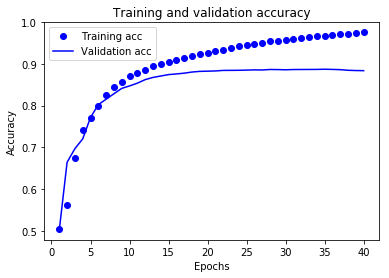

In [24]:
plt.clf() #clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
print(train_labels)

[1 0 0 ... 0 1 0]


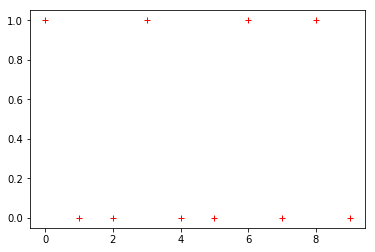

In [31]:
plt.plot(train_labels[:10],'r+')

In [63]:
#plt.plot(test_labels[:10],'r+')

#here you specify the number of instances you want to predict from the test data
x=10
predictions = model.predict(test_data[:x])
print(predictions)

[[0.08274738]
 [0.9973241 ]
 [0.7366882 ]
 [0.7272378 ]
 [0.9923497 ]
 [0.9359286 ]
 [0.94516695]
 [0.02050118]
 [0.9628131 ]
 [0.9975867 ]]


In [37]:
predicted_values = []
for i in predictions:
    predicted_values.append(i[0])

In [38]:
print(predicted_values)

[0.082747385, 0.9973241, 0.7366882, 0.7272378, 0.9923497, 0.9359286, 0.94516695, 0.02050118, 0.9628131, 0.9975867]


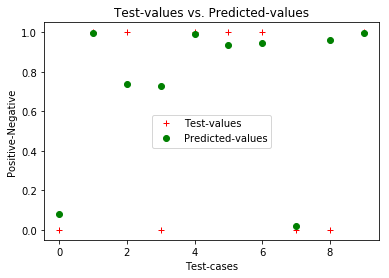

In [40]:
plt.plot(test_labels[:10],'r+',label="Test-values")
plt.plot(predicted_values,'go',label="Predicted-values")
plt.title('Test-values vs. Predicted-values')
plt.xlabel('Test-cases')
plt.ylabel('Positive-Negative')
plt.legend()

plt.show()

In [51]:
decode_review(test_data[1])        

"a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances <UNK> the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere <UNK> with sexual tension and psychological <UNK> it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the <UNK> moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual <UNK> and desperation be patient <UNK> up the atmosphere and pay atte

In [60]:
for index,data in enumerate(test_data[:5]):
    print(decode_review(data))
    print("Actual:")
    if test_labels[index] == 0:
        print("Negative Review.")
    else:
        print("Positive Review.")
    print()
    print("Prediction by model:")
    if predicted_values[index] > 0.5 :
        print("Positive Review.")
    else:
        print("Negative Review.")
    print("-"*30)

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

"<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P